In [1]:
# biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import linspace, diff, zeros_like, arange, array
import numpy as np
import matplotlib.pyplot as plt


c:\Users\frank\.conda\envs\m_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [168]:
folder_name = 'Data'
file_name = 'music_siddharth_trial7.txt'

In [169]:
# Load entire acquisition data.
data, header = bsnb.load(f"{folder_name}/{file_name}", get_header=True)

In [170]:
signal = data['CH2'][70000:-10000]
# signal = data['CH2'][:60000]
# signal = data['CH2'][:-10000]
# Sampling rate definition.
sr = header["sampling rate"]
time = np.array(bsnb.generate_time(signal, sr))

In [132]:
def label_signals(signal, time, ):
    # Step 1 of Pan-Tompkins Algorithm
    filtered_signal = bsnb.detect._ecg_band_pass_filter(signal, sr)
    # Step 2 of Pan-Tompkins Algorithm
    differentiated_signal = diff(filtered_signal)
    # Step 3 of Pan-Tompkins Algorithm
    squared_signal = differentiated_signal * differentiated_signal
    nbr_sampls_int_wind = int(0.080 * sr)
    integrated_signal = zeros_like(squared_signal)
    cumulative_sum = squared_signal.cumsum()
    integrated_signal[nbr_sampls_int_wind:] = (cumulative_sum[nbr_sampls_int_wind:] - 
                                            cumulative_sum[:-nbr_sampls_int_wind]) / nbr_sampls_int_wind
    integrated_signal[:nbr_sampls_int_wind] = cumulative_sum[:nbr_sampls_int_wind] / arange(1, nbr_sampls_int_wind + 1)
    rr_buffer, signal_peak_1, noise_peak_1, threshold = bsnb.detect._buffer_ini(integrated_signal, sr)
    probable_peaks, possible_peaks= bsnb.detect._detects_peaks(integrated_signal, sr)

    definitive_peaks = bsnb.detect._checkup(probable_peaks, integrated_signal, sr, rr_buffer, signal_peak_1, noise_peak_1, threshold)

    # Conversion to integer type.
    definitive_peaks = array(list(map(int, definitive_peaks)))
    map_integers = definitive_peaks - 40 * (sr / 1000)
    definitive_peaks_reph = array(list(map(int, map_integers)))
    return definitive_peaks_reph, integrated_signal, differentiated_signal

In [76]:
def graph_ecg(Sig, time):
    fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=True)

    # Plot accelerometer data
    axs.plot(time, Sig)
    axs.set_ylabel('X Axis')
    axs.grid(True)
    # Set title for the entire plot
    plt.suptitle('ECG Data')

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

In [171]:
definitive_peaks_reph, integrated_signal, differentiated_signal = label_signals(signal, time)

In [164]:
mask = (definitive_peaks_reph >= 40000) & (definitive_peaks_reph <= 50000)

# Apply the mask to the original array
smaller_array = definitive_peaks_reph[mask]

In [32]:
print(definitive_peaks_reph)

[   442   1124   1816   2484   3153   3826   4522   5208   5870   6570
   7259   7939   8612   9295   9984  10700  11396  12097  12798  13495
  14176  14871  15560  16255  16943  17645  18368  19069  19738  20409
  21059  21712  22355  22980  23604  24243  24888  25533  26214  26862
  27507  28123  28798  29457  30114  30733  31357  31998  32637  33297
  33991  34672  35370  36060  36744  37395  38042  38708  39391  40095
  40784  41491  42142  42778  43421  44090  44763  45422  46062  46708
  47366  48047  48774  49485  50194  50903  51585  52300  52990  53684
  54378  55071  55751  56437  57111  57798  58488  59149  59804  60446
  61075  61718  62369  63029  63702  64371  65035  65738  66433  67087
  67770  68417  69096  69730  70369  71003  71646  72324  73016  73713
  74397  75077  75741  76394  77069  77714  78374  79027  79687  80333
  80983  81666  82358  83058  83763  84455  85168  85858  86514  87204
  87872  88546  89204  89841  90490  91158  91864  92612  93337  94042
  9473

In [33]:
peak_gap = np.diff(definitive_peaks_reph)
print(peak_gap)

[682 692 668 669 673 696 686 662 700 689 680 673 683 689 716 696 701 701
 697 681 695 689 695 688 702 723 701 669 671 650 653 643 625 624 639 645
 645 681 648 645 616 675 659 657 619 624 641 639 660 694 681 698 690 684
 651 647 666 683 704 689 707 651 636 643 669 673 659 640 646 658 681 727
 711 709 709 682 715 690 694 694 693 680 686 674 687 690 661 655 642 629
 643 651 660 673 669 664 703 695 654 683 647 679 634 639 634 643 678 692
 697 684 680 664 653 675 645 660 653 660 646 650 683 692 700 705 692 713
 690 656 690 668 674 658 637 649 668 706 748 725 705 694 664 637 628 617
 690 689 751 725 730 665 672 666 660 688 680 690 685 677 670 694 703 717
 660 706 680 706 702 657 653 658 659 665 674 715 684 661 698 667 683 690
 679 686 666 687 675 670 648 679 672 667 674 674 671 676 657 650 653 654
 657 638 655 643 628 657 692 687 684 685 667 664 666 654 641 651 689 719
 708 697 699 685 689 685 678 676 676 665 666 667 686 692 716 693 636 671
 652 659 665 705 681 703 680 674 664 699 679 681 67

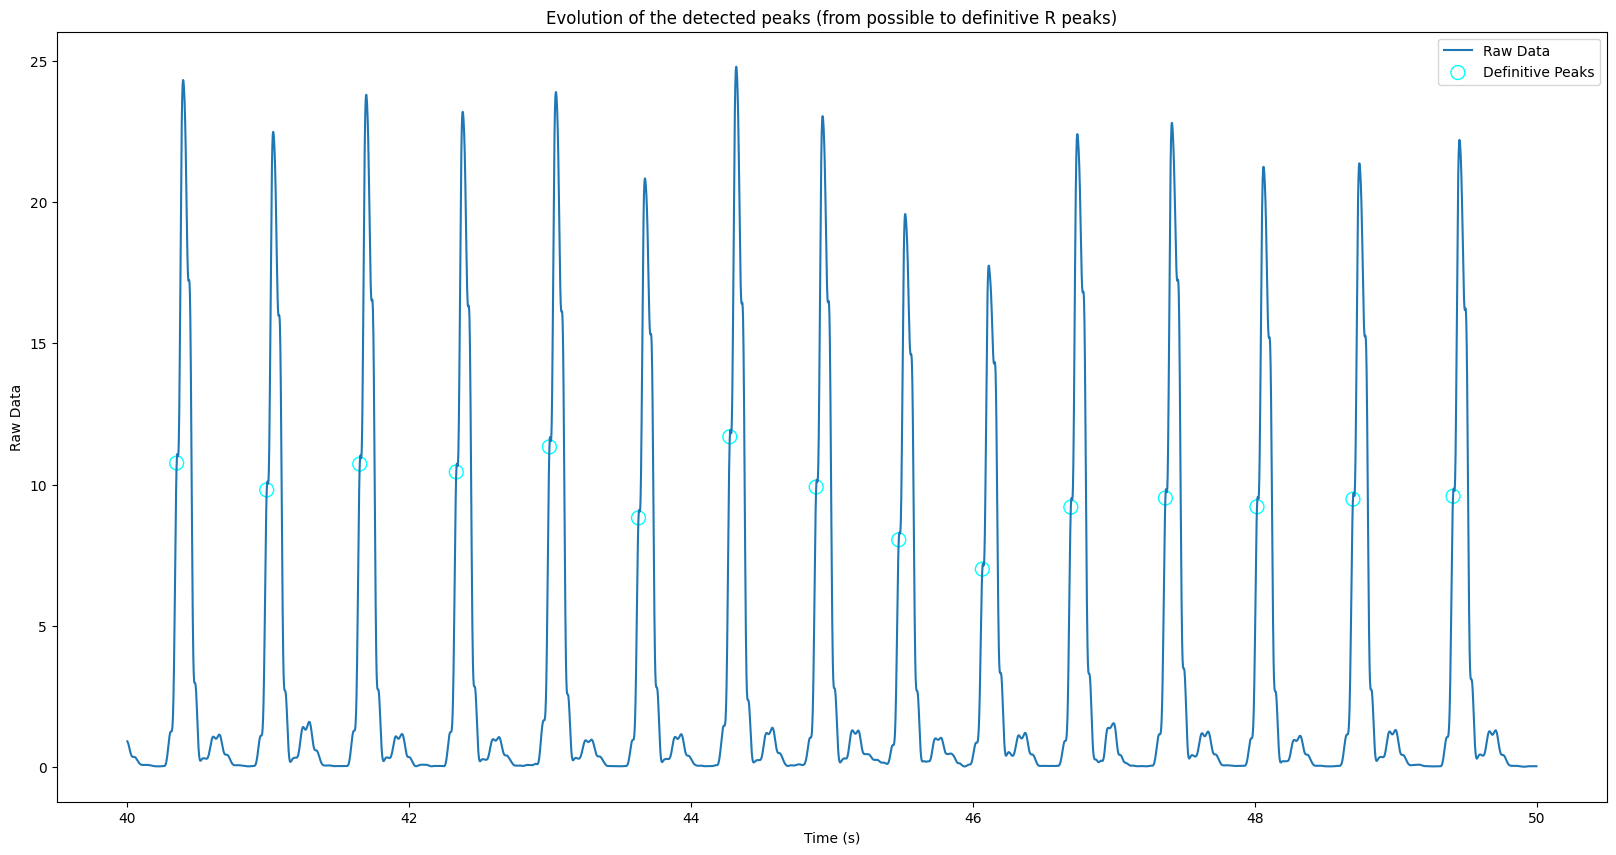

In [165]:
# Plotting the raw ECG data
plt.figure(figsize=(20, 10))
plt.plot(time[40000:50000], integrated_signal[40000:50000], label='Raw Data')

# Plotting the definitive peaks
plt.scatter([time[i] for i in smaller_array], [integrated_signal[i] for i in smaller_array], s=100, edgecolor='cyan', facecolors='none', label='Definitive Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Raw Data')
plt.title('Evolution of the detected peaks (from possible to definitive R peaks)')
plt.legend()
plt.show()

In [88]:
def split_signal_by_peaks(integrated_signal, signal, peak_indices, label):
    # Initialize lists to store segmented signals
    integrated_segments = []
    signal_segments = []
    labels = []
    # Split the integrated_signal and signal based on peak indices
    for i in range(len(peak_indices) - 1):
        start_index = peak_indices[i]
        end_index = peak_indices[i + 1]
        integrated_segments.append(integrated_signal[start_index:end_index])
        signal_segments.append(signal[start_index:end_index])
        labels.append(label)
    
    return integrated_segments, signal_segments, labels

In [172]:
integrated_segments, signal_segments, labels = split_signal_by_peaks(integrated_signal, signal, definitive_peaks_reph, label=1)


In [15]:
import json
import os

def append_to_json_file(data, filename):
    # Check if the file exists
    if os.path.exists(filename):
        # If the file exists, load its contents
        with open(filename, 'r') as file:
            existing_data = json.load(file)
        # Append new data to the existing data
        existing_data.extend(data)
        # Write the combined data back to the file
        with open(filename, 'w') as file:
            json.dump(existing_data, file, indent=4)
    else:
        # If the file doesn't exist, create it and write the data
        with open(filename, 'w') as file:
            json.dump(data, file, indent=4)

In [173]:
# Example usage:
# Define the filename
filename = "Siddharth_ECG.json"
data_to_append = []
# Iterate over the segmented signals and labels
for i in range(len(integrated_segments)):
    # Create a dictionary for each segment and its corresponding label
    segment_data = {
        "integrated_segment": integrated_segments[i].tolist(),  # Convert numpy array to list
        "signal_segment": signal_segments[i].tolist(),          # Convert numpy array to list
        "label": labels[i]
    }
    # Append the segment data to the list
    data_to_append.append(segment_data)

# Append the data to the JSON file
append_to_json_file(data_to_append, filename)